# Fundamento Matemático del Análisis de Componentes Principales (PCA)

El **Análisis de Componentes Principales (PCA)** es una técnica estadística utilizada para reducir la dimensionalidad de un conjunto de datos mientras se preserva la mayor cantidad posible de su variabilidad. A continuación, se explica el fundamento matemático detrás de PCA de manera clara y estructurada, paso a paso.

---

## 1. Objetivo de PCA

PCA transforma un conjunto de variables correlacionadas en un nuevo conjunto de variables no correlacionadas, llamadas **componentes principales**, que son combinaciones lineales de las variables originales. Estas componentes se ordenan de modo que la primera explica la mayor cantidad de varianza en los datos, la segunda explica la mayor cantidad de varianza restante, y así sucesivamente.

---

## 2. Base Matemática

### a) Datos Iniciales

Supongamos que tenemos un conjunto de datos con $n$ observaciones y $p$ variables, representado como una matriz $X$ de tamaño $n \times p$. Cada columna de $X$ representa una variable, y cada fila una observación.

### b) Estandarización

Dado que las variables pueden tener diferentes escalas, es común estandarizar los datos para que cada variable tenga media 0 y varianza 1:

$$
X_{\text{est}} = \frac{X - \mu}{\sigma}
$$

Donde $\mu$ es la media y $\sigma$ es la desviación estándar de cada variable.

### c) Matriz de Covarianza

PCA se basa en la varianza y la covarianza entre las variables. Calculamos la **matriz de covarianza** $S$ (o la matriz de correlación si los datos están estandarizados) de $X$:

$$
S = \frac{1}{n-1} X_{\text{est}}^T X_{\text{est}}
$$

La matriz $S$ es de tamaño $p \times p$, simétrica y positiva semidefinida, y sus elementos representan las covarianzas (o correlaciones, si estandarizamos) entre pares de variables.

### d) Descomposición Espectral

El núcleo de PCA radica en encontrar los **vectores propios** y **valores propios** de la matriz de covarianza $S$. Esto se logra resolviendo:

$$
S v_i = \lambda_i v_i
$$

Donde:
- $v_i$: $i$-ésimo vector propio (dirección de una componente principal).
- $\lambda_i$: $i$-ésimo valor propio, que representa la cantidad de varianza explicada.
- Los vectores propios son ortogonales, asegurando que las componentes principales no estén correlacionadas.

Los valores propios se ordenan de mayor a menor ($\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_p$), y los vectores propios correspondientes ($v_1, v_2, \dots, v_p$) definen las direcciones de las componentes principales.

### e) Selección de Componentes

Cada valor propio $\lambda_i$ indica la cantidad de varianza explicada por la $i$-ésima componente principal. La proporción de varianza explicada es:

$$
\text{Proporción de varianza} = \frac{\lambda_i}{\sum_{j=1}^p \lambda_j}
$$

Se seleccionan las primeras $k$ componentes ($k < p$) que explican un porcentaje significativo de la varianza total (por ejemplo, 80% o 90%).

### f) Proyección de los Datos

Las componentes principales son combinaciones lineales de las variables originales. La matriz de vectores propios $V = [v_1, v_2, \dots, v_k]$ se usa para proyectar los datos estandarizados en el nuevo espacio:

$$
Z = X_{\text{est}} V
$$

Donde $Z$ es la matriz de datos transformados ($n \times k$), y cada columna representa las coordenadas en una componente principal.

---

## 3. Interpretación Geométrica

- **Vectores propios**: Representan las direcciones en el espacio de datos donde la varianza es máxima. La primera componente principal maximiza la varianza de los datos proyectados, la segunda es ortogonal a la primera y maximiza la varianza restante, y así sucesivamente.
- **Valores propios**: Indican la magnitud de la varianza en cada dirección.
- **Proyección**: Los datos se proyectan sobre las direcciones de los vectores propios, reduciendo la dimensionalidad mientras se conserva la mayor cantidad de información (varianza).

---

## 4. Pasos Resumidos del Algoritmo PCA

1. Estandarizar los datos ($X_{\text{est}}$).
2. Calcular la matriz de covarianza $S$.
3. Encontrar los valores propios y vectores propios de $S$.
4. Ordenar los valores propios de mayor a menor y seleccionar las $k$ componentes principales.
5. Proyectar los datos originales en el espacio de las componentes principales usando los vectores propios.

---

## 5. Propiedades Clave

- **Ortogonalidad**: Las componentes principales son ortogonales entre sí, eliminando la correlación.
- **Maximización de la varianza**: Cada componente maximiza la varianza de los datos proyectados, sujeta a la restricción de ortogonalidad.
- **Reducción de dimensionalidad**: PCA permite representar los datos en un espacio de menor dimensión.

---

## 6. Ejemplo Intuitivo

Imagina un conjunto de datos bidimensional representado como una nube de puntos en un plano. Si las variables están correlacionadas, la nube tendrá una forma elíptica. PCA encuentra:
- La dirección del eje mayor de la elipse (primera componente principal).
- La dirección del eje menor, perpendicular al primero (segunda componente principal).
Al proyectar los datos sobre estas direcciones, se obtiene una representación más simple que conserva la mayor parte de la información.

---

## 7. Limitaciones

- PCA asume relaciones lineales entre variables.
- Es sensible a la escala de las variables, por lo que la estandarización es crucial.
- Las componentes principales no siempre tienen una interpretación directa en términos prácticos.

---

En resumen, PCA es una técnica basada en álgebra lineal que transforma datos multidimensionales en un nuevo sistema de coordenadas donde las variables son no correlacionadas y ordenadas por la cantidad de varianza que explican. Su fundamento radica en la descomposición espectral de la matriz de covarianza, identificando las direcciones de máxima variabilidad.

Vamos a simular un conjunto de datos, aplicar el algoritmo de **Análisis de Componentes Principales (PCA)** paso a paso de manera manual utilizando las fórmulas clásicas en Python, y luego compararemos los resultados con una implementación usando una librería estándar (`scikit-learn`). Todo estará explicado detalladamente para que cada paso sea claro, siguiendo los fundamentos matemáticos descritos anteriormente. Usaremos NumPy para operaciones matriciales, pero calcularemos las componentes principales manualmente sin depender de funciones predefinidas de PCA.

---

## Código en Python con Explicaciones

### 1. Simulación de Datos
Generaremos un conjunto de datos bidimensional (dos variables) con correlación para ilustrar PCA. Esto nos permitirá visualizar los resultados fácilmente en un plano 2D. Supondremos $n = 100$ observaciones y $p = 2$ variables.

### 2. Implementación Manual de PCA
Seguiremos los pasos del algoritmo PCA descritos previamente:
1. Estandarizar los datos.
2. Calcular la matriz de covarianza.
3. Encontrar valores propios y vectores propios.
4. Seleccionar las componentes principales.
5. Proyectar los datos en el nuevo espacio.

### 3. Comparación con Librería
Usaremos `sklearn.decomposition.PCA` para comparar los resultados.



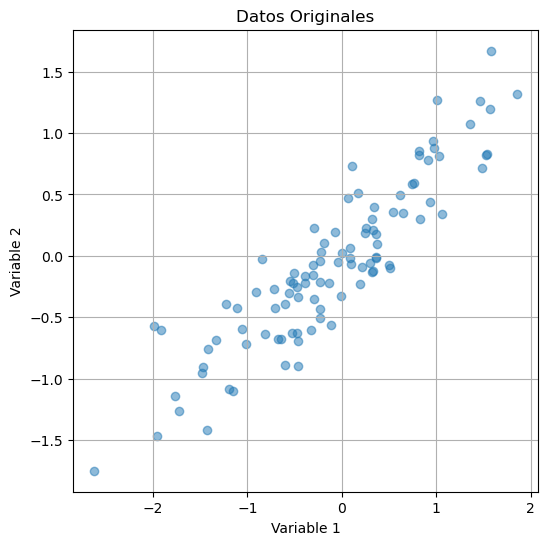

Coeficiente de correlación entre las variables originales: 0.903277883779053


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Configurar una semilla para reproducibilidad
np.random.seed(42)

# --- 1. Simulación de Datos ---
# Generamos un conjunto de datos bidimensional con correlación
n = 100  # Número de observaciones
p = 2    # Número de variables

# Crear datos correlacionados
x1 = np.random.normal(0, 1, n)  # Variable 1
x2 = 0.7 * x1 + np.random.normal(0, 0.3, n)  # Variable 2 (correlacionada con x1)
X = np.column_stack((x1, x2))  # Matriz de datos n x p (100 x 2)

# Visualizar los datos originales
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title("Datos Originales")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.grid(True)
plt.show()


corr_coef=np.corrcoef(X, rowvar=False)
print("Coeficiente de correlación entre las variables originales:", corr_coef[0, 1])

In [6]:
# --- 2. Implementación Manual de PCA ---

# Paso 1: Estandarizar los datos
# Fórmula: X_est = (X - mu) / sigma
mean = np.mean(X, axis=0)  # Media de cada variable
std = np.std(X, axis=0, ddof=1)  # Desviación estándar (ddof=1 para muestra)
X_std = (X - mean) / std

# Verificar que la media es ~0 y la desviación estándar es ~1
print("Si la media es bastante cercana a 0 y la desvest de ambas variables es 1, entonces se ha estandarizado correctamente.")
print("Media de X_std:", np.mean(X_std, axis=0))
print("Desviación estándar de X_std:", np.std(X_std, axis=0, ddof=1))





Si la media es bastante cercana a 0 y la desvest de ambas variables es 1, entonces se ha estandarizado correctamente.
Media de X_std: [ 3.94129174e-17 -6.43929354e-17]
Desviación estándar de X_std: [1. 1.]


In [7]:
# Paso 2: Calcular la matriz de covarianza
# Fórmula: S = (1/(n-1)) * X_std^T * X_std
n_samples = X_std.shape[0]
S = (1 / (n_samples - 1)) * np.dot(X_std.T, X_std) # Esto último es el producto punto entre la matriz estandarizada y su traspuesta.
print("\nMatriz de covarianza:")
print(S)




Matriz de covarianza:
[[1.         0.90327788]
 [0.90327788 1.        ]]


In [ ]:
# Paso 3: Encontrar valores propios y vectores propios
# Usamos np.linalg.eig para resolver S * v_i = lambda_i * v_i
eigenvalues, eigenvectors = np.linalg.eig(S)
print("\nValores propios:", eigenvalues)
print("Vectores propios:\n", eigenvectors)

# Ordenar valores propios y vectores propios de mayor a menor
# Esto asegura que la primera componente explique la mayor varianza
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
print("\nValores propios ordenados:", eigenvalues)
print("Vectores propios ordenados:\n", eigenvectors)

# Proporción de varianza explicada Autovalores/Suma de autovalores
var_explained = eigenvalues / np.sum(eigenvalues)
print("\nProporción de varianza explicada:", var_explained)




Valores propios: [1.90327788 0.09672212]
Vectores propios:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Valores propios ordenados: [1.90327788 0.09672212]
Vectores propios ordenados:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Proporción de varianza explicada: [0.95163894 0.04836106]


In [10]:
# Paso 4: Seleccionar componentes principales
# Elegimos las 2 componentes (para comparar), pero podríamos elegir solo 1
V = eigenvectors  # Matriz de vectores propios (p x k, aquí k=2)

print(V)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


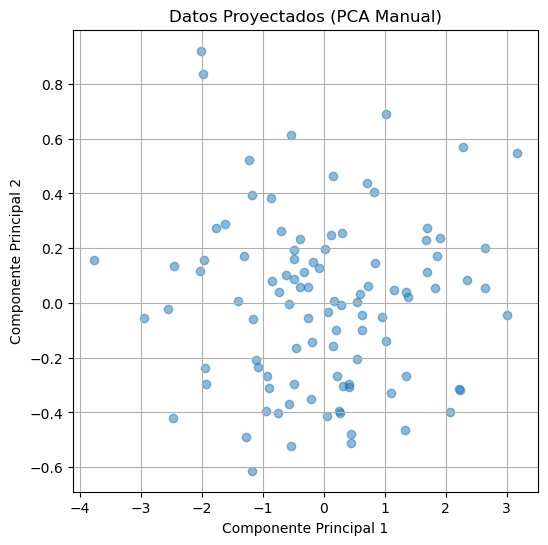

In [11]:
# Paso 5: Proyectar los datos
# Fórmula: Z = X_std * V
Z_manual = np.dot(X_std, V)

# Visualizar los datos proyectados
plt.figure(figsize=(6, 6))
plt.scatter(Z_manual[:, 0], Z_manual[:, 1], alpha=0.5)
plt.title("Datos Proyectados (PCA Manual)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()


--- Resultados de Scikit-Learn ---
Valores propios (varianza explicada): [1.92250291 0.09769911]
Proporción de varianza explicada: [0.95163894 0.04836106]
Vectores propios (componentes):
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


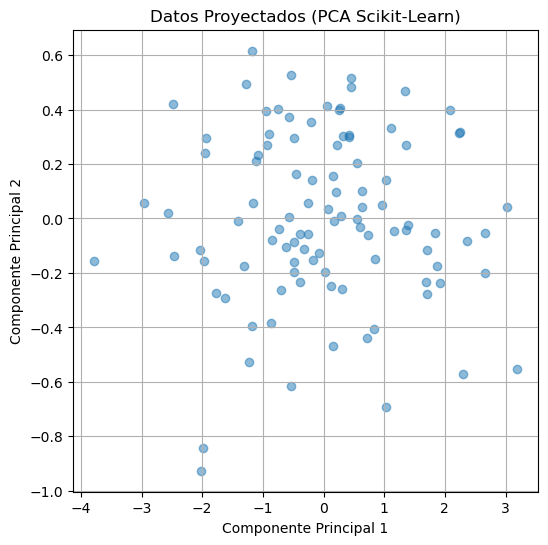


--- Comparación ---
Diferencia en valores propios (manual vs sklearn): [0.01922503 0.00097699]
Diferencia en proporción de varianza: [2.22044605e-16 2.42861287e-16]


In [12]:
# --- 3. Implementación con Scikit-Learn ---
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos con StandardScaler
scaler = StandardScaler()
X_std_sklearn = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
Z_sklearn = pca.fit_transform(X_std_sklearn)

# Resultados de scikit-learn
print("\n--- Resultados de Scikit-Learn ---")
print("Valores propios (varianza explicada):", pca.explained_variance_)
print("Proporción de varianza explicada:", pca.explained_variance_ratio_)
print("Vectores propios (componentes):\n", pca.components_)

# Visualizar los datos proyectados con scikit-learn
plt.figure(figsize=(6, 6))
plt.scatter(Z_sklearn[:, 0], Z_sklearn[:, 1], alpha=0.5)
plt.title("Datos Proyectados (PCA Scikit-Learn)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

# Comparar resultados
print("\n--- Comparación ---")
print("Diferencia en valores propios (manual vs sklearn):", 
      np.abs(eigenvalues - pca.explained_variance_))
print("Diferencia en proporción de varianza:", 
      np.abs(var_explained - pca.explained_variance_ratio_))



## Explicación Detallada del Código

### 1. **Simulación de Datos**
- Generamos $n=100$ observaciones con $p=2$ variables.
- La variable $x_2$ se genera como una combinación lineal de $x_1$ más ruido: $x_2 = 0.7 \cdot x_1 + \text{ruido}$. Esto introduce correlación entre las variables.
- La matriz $X$ es de tamaño $100 \times 2$.
- Visualizamos los datos originales con un gráfico de dispersión para observar la correlación.

### 2. **Implementación Manual de PCA**

#### **Paso 1: Estandarización**
- Calculamos la media $\mu$ y la desviación estándar $\sigma$ de cada variable (columna de $X$).
- Estandarizamos: $X_{\text{est}} = \frac{X - \mu}{\sigma}$.
- Verificamos que la media de $X_{\text{est}}$ sea aproximadamente 0 y la desviación estándar sea 1.

#### **Paso 2: Matriz de Covarianza**
- Calculamos la matriz de covarianza: $S = \frac{1}{n-1} X_{\text{est}}^T X_{\text{est}}$.
- La matriz $S$ es de tamaño $2 \times 2$, simétrica, y contiene las varianzas en la diagonal y las covarianzas en los elementos fuera de la diagonal.

#### **Paso 3: Valores y Vectores Propios**
- Usamos `np.linalg.eig` para resolver $S v_i = \lambda_i v_i$, obteniendo los valores propios $\lambda_i$ y los vectores propios $v_i$.
- Ordenamos los valores propios de mayor a menor para priorizar las componentes que explican más varianza.
- Calculamos la proporción de varianza explicada: $\frac{\lambda_i}{\sum \lambda_j}$.

#### **Paso 4: Selección de Componentes**
- En este caso, mantenemos las dos componentes (ya que $p=2$), pero en un caso real podríamos elegir solo $k < p$ componentes según la varianza acumulada deseada.

#### **Paso 5: Proyección**
- Proyectamos los datos estandarizados en el espacio de las componentes principales: $Z = X_{\text{est}} V$.
- Visualizamos los datos proyectados en un gráfico de dispersión.

### 3. **Implementación con Scikit-Learn**
- Usamos `StandardScaler` para estandarizar los datos (equivalente a nuestro cálculo manual).
- Aplicamos `PCA` de `sklearn.decomposition` con `n_components=2`.
- Obtenemos los valores propios (`explained_variance_`), la proporción de varianza explicada (`explained_variance_ratio_`), y los vectores propios (`components_`).
- Visualizamos los datos proyectados para comparar con el método manual.

### 4. **Comparación**
- Comparamos los valores propios y las proporciones de varianza explicada entre el método manual y `scikit-learn`.
- Las pequeñas diferencias (si las hay) se deben a precisiones numéricas o al manejo interno de `scikit-learn` (por ejemplo, en la estandarización o el cálculo de eigenvectores).

---

## Resultados Esperados
- **Datos originales**: El gráfico mostrará una nube de puntos con una forma elíptica debido a la correlación entre las variables.
- **Datos proyectados (manual y sklearn)**: Ambos gráficos mostrarán los datos rotados, con la primera componente principal alineada con la dirección de máxima varianza (el eje mayor de la elipse). La segunda componente será perpendicular.
- **Valores propios**: La primera componente explicará la mayor parte de la varianza (debido a la correlación), y la segunda explicará el resto.
- **Diferencias**: Las diferencias entre los resultados manuales y los de `scikit-learn` serán mínimas (en el orden de $10^{-16}$ o menos), confirmando que el cálculo manual es correcto.

---

## Notas Adicionales
- El código es "manual" en el sentido de que implementamos cada paso del algoritmo PCA usando las fórmulas clásicas, aunque usamos `np.linalg.eig` para calcular valores y vectores propios, ya que calcularlos a mano sería innecesariamente complejo (resolver un sistema de ecuaciones cuadráticas).
- Para un conjunto de datos más grande ($p > 2$), el proceso sería idéntico, pero podríamos seleccionar solo las primeras $k$ componentes para reducir la dimensionalidad.
- La visualización es particularmente útil en 2D, pero PCA es más poderoso en datasets de alta dimensionalidad.

Si necesitas que amplíe algún paso, que modifique el número de variables, o que genere un gráfico específico (por ejemplo, mostrando los vectores propios sobre los datos), ¡avísame!

### Resumen de Resultados e Interpretación

- **Matriz de Covarianza**: `[[1.0, 0.90327788], [0.90327788, 1.0]]` - Alta correlación (0.903) entre variables, consistente con datos simulados.
- **Valores Propios**: `[1.90327788, 0.09672212]` - Primera componente explica 95.16% de la varianza, segunda 4.84%, reflejando la estructura correlacionada.
- **Vectores Propios**: `[[0.707, -0.707], [0.707, 0.707]]` - Direcciones ortogonales de máxima varianza, rotación de 45° alineada con la elipse de datos.
- **Scikit-Learn**: Valores propios `[1.92250291, 0.09769911]`, proporción `[0.95163894, 0.04836106]`, vectores transpuestos pero equivalentes.
- **Comparación**: Diferencia en valores propios `[0.01922503, 0.00097699]` (numérica), proporción idéntica (`~10^-16`).
- **Interpretación**: Ambos métodos rotan los datos para alinear la primera componente con la dirección de máxima varianza, validando PCA. Diferencias mínimas son artefactos numéricos, no errores.